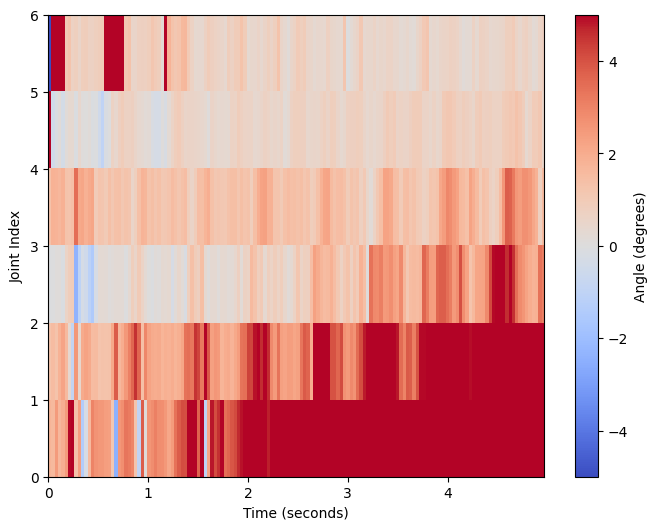

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Limit to the first 5 seconds (150 frames)
frame_rate = 30
num_frames = 5 * frame_rate  # First 5 seconds
coordinates_df = coordinates_df.head(num_frames)

# Calculate angles using every 3 consecutive markers (forming tangent angles)
angles = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df.iloc[:, 2*i+1].values - coordinates_df.iloc[:, 2*i].values
    vec1_y = coordinates_df.iloc[:, 2*i+2].values - coordinates_df.iloc[:, 2*i+1].values
    vec2_x = coordinates_df.iloc[:, 2*i+3].values - coordinates_df.iloc[:, 2*i+2].values
    vec2_y = coordinates_df.iloc[:, 2*i+4].values - coordinates_df.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -20° and 20°
    filtered_angle = np.clip(angle, -20, 20)
    
    angles.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles = np.array(angles)

# Time axis: convert frames to seconds
time_axis = np.arange(angles.shape[1]) / frame_rate

# Now, let's plot the heatmap for the first 5 seconds
plt.figure(figsize=(8,6))
plt.imshow(angles, aspect='auto', cmap='coolwarm', extent=[time_axis.min(), time_axis.max(), 0, len(angles)])
plt.colorbar(label='Angle (degrees)')
plt.clim(-5, 5)  # Set the color limits to -20 to 20 degrees


plt.xlabel('Time (seconds)')
plt.ylabel('Joint Index')


plt.show()


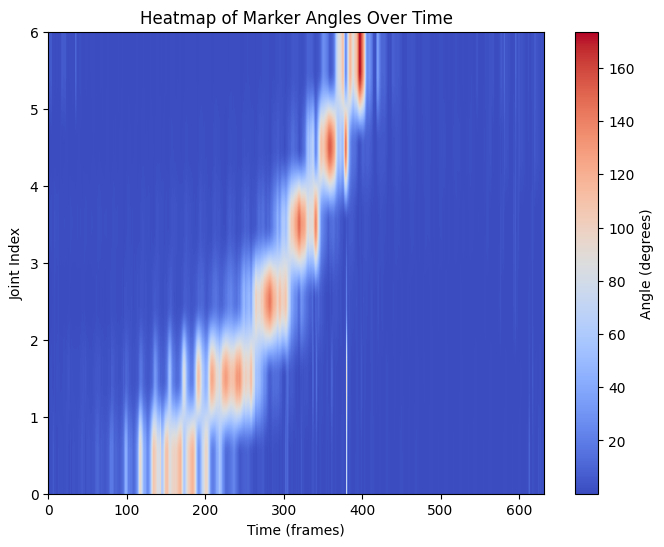

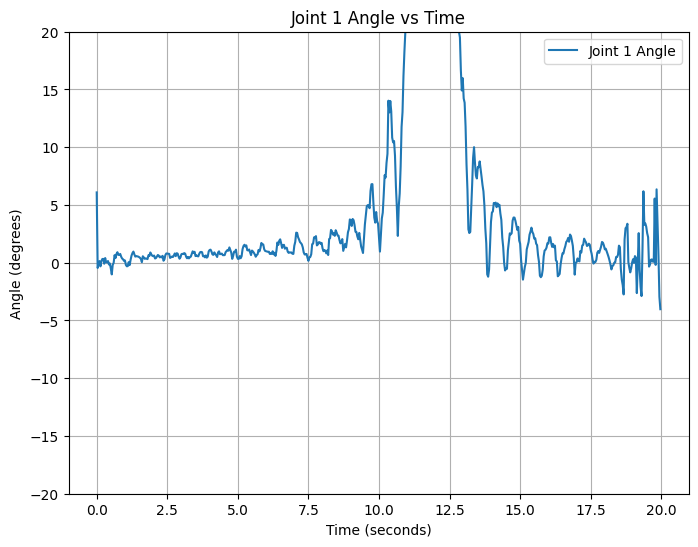

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Limit to the first 5 seconds (150 frames)
frame_rate = 30
num_frames = 20 * frame_rate  # First 5 seconds
coordinates_df = coordinates_df.head(num_frames)

# Calculate angles using every 3 consecutive markers (forming tangent angles)
angles = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df.iloc[:, 2*i+1].values - coordinates_df.iloc[:, 2*i].values
    vec1_y = coordinates_df.iloc[:, 2*i+2].values - coordinates_df.iloc[:, 2*i+1].values
    vec2_x = coordinates_df.iloc[:, 2*i+3].values - coordinates_df.iloc[:, 2*i+2].values
    vec2_y = coordinates_df.iloc[:, 2*i+4].values - coordinates_df.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -20° and 20°
    filtered_angle = np.clip(angle, -20, 20)
    
    angles.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles = np.array(angles)

# Time axis: convert frames to seconds
time_axis = np.arange(angles.shape[1]) / frame_rate

# Plot the angle for Joint 1 (first angle in the angles array)
joint_1_angles = angles[1]  # First joint corresponds to the first angle

plt.figure(figsize=(8,6))
plt.plot(time_axis, joint_1_angles, label='Joint 1 Angle')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Joint 1 Angle vs Time')
plt.ylim(-20, 20)  # Keep the y-axis within the angle range
plt.grid(True)
plt.legend()
plt.show()


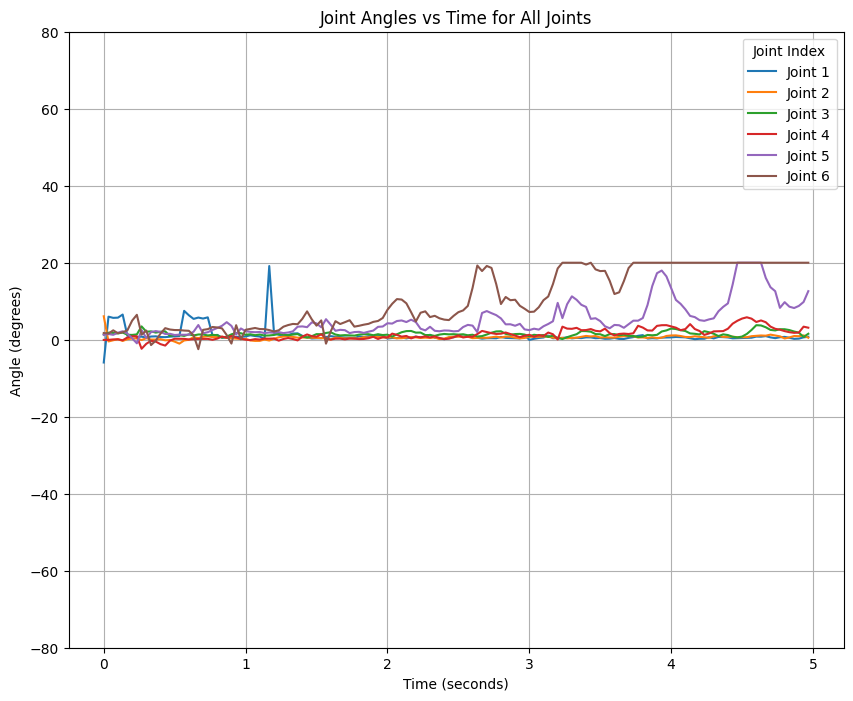

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Limit to the first 5 seconds (150 frames)
frame_rate = 30
num_frames = 5 * frame_rate  # First 5 seconds
coordinates_df = coordinates_df.head(num_frames)

# Calculate angles using every 3 consecutive markers (forming tangent angles)
angles = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df.iloc[:, 2*i+1].values - coordinates_df.iloc[:, 2*i].values
    vec1_y = coordinates_df.iloc[:, 2*i+2].values - coordinates_df.iloc[:, 2*i+1].values
    vec2_x = coordinates_df.iloc[:, 2*i+3].values - coordinates_df.iloc[:, 2*i+2].values
    vec2_y = coordinates_df.iloc[:, 2*i+4].values - coordinates_df.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -20° and 20°
    filtered_angle = np.clip(angle, -20, 20)
    
    angles.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles = np.array(angles)

# Time axis: convert frames to seconds
time_axis = np.arange(angles.shape[1]) / frame_rate

# Plot the angles for all joints
plt.figure(figsize=(10, 8))

for i in range(angles.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis, angles[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Joint Angles vs Time for All Joints')
plt.ylim(-20, 20)  # Keep the y-axis within the angle range
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


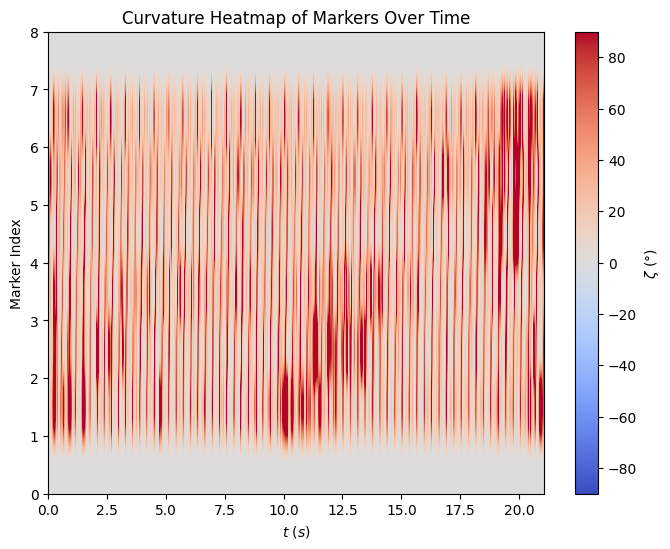

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Helper function for maximal blurred segments
def maxBlurredSegments(points, nu):
    n = len(points)
    return np.array([[max(0, i - nu), min(i + nu, n - 1)] for i in range(n)])

# Helper function to calculate curvature at a point based on three points (left, current, right)
def curvatureAtPoint(point, leftPoint, rightPoint):
    v1 = np.array(point) - np.array(leftPoint)
    v2 = np.array(rightPoint) - np.array(point)
    
    dot_product = np.dot(v1, v2)
    magnitude1 = np.linalg.norm(v1)
    magnitude2 = np.linalg.norm(v2)
    
    cos_theta = dot_product / (magnitude1 * magnitude2)
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    return angle

# Discrete curvature calculation
def discreteCurvatures(points, nu):
    curvs = []
    C = maxBlurredSegments(points, nu)
    n = len(points)  # Number of points
    m = len(C)  # Number of blurred segments

    for index in range(1, n - 1):
        point = points[index]
        row = 0

        # Find leftPoint
        while C[row, 1] < index:
            row += 1
        leftPoint = points[C[row, 0]]

        row = m - 1

        # Find rightPoint
        while C[row, 0] > index:
            row -= 1
        rightPoint = points[C[row, 1]]

        # Calculate curvature at this point
        curvature = curvatureAtPoint(point, leftPoint, rightPoint)
        curvs.append(curvature)

    return np.array(curvs)

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Extracting the marker points
points = coordinates_df.values  # Get all the x, y points

# Define frame rate (e.g., 30 frames per second)
frame_rate = 30
time_axis = np.arange(points.shape[0]) / frame_rate  # Convert frames to seconds for the x-axis

# Apply discrete curvature calculation using nu = 1 (this can be adjusted)
nu = 1
curvatures = []

# Calculate curvatures for each marker at each time frame
for i in range(1, len(points) - 1):  # Skip the first and last marker for curvature calculation
    marker_curvs = []
    for j in range(0, len(points[i]), 2):  # Loop through each marker (even indices for x, odd for y)
        if j == 0 or j == len(points[i]) - 2:  # Skip the first and last markers
            marker_curvs.append(0)  # Set to 0 as we can't calculate curvature
        else:
            left_point = [points[i - 1][j], points[i - 1][j + 1]]  # Left point (previous frame)
            right_point = [points[i + 1][j], points[i + 1][j + 1]]  # Right point (next frame)
            point = [points[i][j], points[i][j + 1]]  # Current point

            curvature = curvatureAtPoint(point, left_point, right_point)
            marker_curvs.append(curvature)
    curvatures.append(marker_curvs)

curvatures = np.array(curvatures)

# Now, let's plot the heatmap similar to your provided figure
plt.figure(figsize=(8, 6))
plt.imshow(curvatures.T, aspect='auto', cmap='coolwarm', extent=[time_axis.min(), time_axis.max(), 0, curvatures.shape[1]])
plt.colorbar(label=r'$\zeta \ (°)$', orientation='vertical')
plt.clim(-90, 90)  # Set the color limits to -90 to 90 degrees to match the example
plt.xlabel(r'$t \ (s)$')
plt.ylabel('Marker Index')
plt.title('Curvature Heatmap of Markers Over Time')
plt.show()


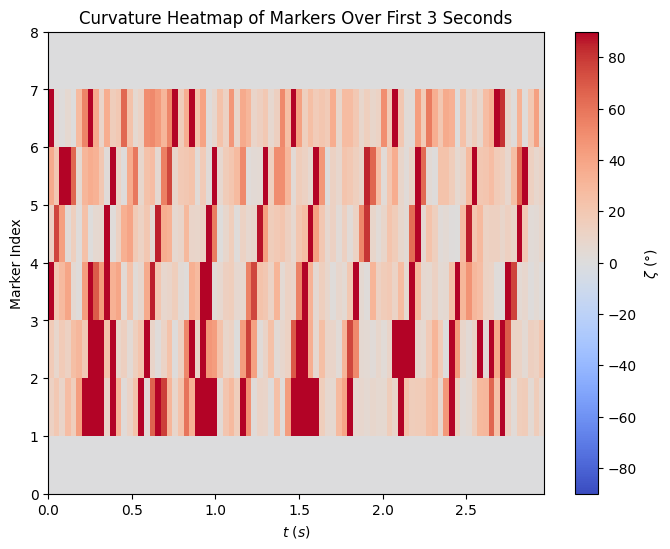

In [45]:
# Adjusting the code to limit to the first 3 seconds of data

# Get the first 3 seconds (3 * frame_rate frames)
num_frames = 3 * frame_rate
points_3_seconds = points[:num_frames]

# Apply discrete curvature calculation for the first 3 seconds
curvatures_3_seconds = []

for i in range(1, len(points_3_seconds) - 1):  # Skip the first and last marker for curvature calculation
    marker_curvs = []
    for j in range(0, len(points_3_seconds[i]), 2):  # Loop through each marker (even indices for x, odd for y)
        if j == 0 or j == len(points_3_seconds[i]) - 2:  # Skip the first and last markers
            marker_curvs.append(0)  # Set to 0 as we can't calculate curvature
        else:
            left_point = [points_3_seconds[i - 1][j], points_3_seconds[i - 1][j + 1]]  # Left point (previous frame)
            right_point = [points_3_seconds[i + 1][j], points_3_seconds[i + 1][j + 1]]  # Right point (next frame)
            point = [points_3_seconds[i][j], points_3_seconds[i][j + 1]]  # Current point

            curvature = curvatureAtPoint(point, left_point, right_point)
            marker_curvs.append(curvature)
    curvatures_3_seconds.append(marker_curvs)

curvatures_3_seconds = np.array(curvatures_3_seconds)

# Time axis for the first 3 seconds
time_axis_3_seconds = np.arange(points_3_seconds.shape[0]) / frame_rate  # Convert frames to seconds for the x-axis

# Now, let's plot the heatmap for the first 3 seconds
plt.figure(figsize=(8, 6))
plt.imshow(curvatures_3_seconds.T, aspect='auto', cmap='coolwarm', extent=[time_axis_3_seconds.min(), time_axis_3_seconds.max(), 0, curvatures_3_seconds.shape[1]])
plt.colorbar(label=r'$\zeta \ (°)$', orientation='vertical')
plt.clim(-90, 90)  # Set the color limits to -90 to 90 degrees to match the example
plt.xlabel(r'$t \ (s)$')
plt.ylabel('Marker Index')
plt.title('Curvature Heatmap of Markers Over First 3 Seconds')
plt.show()


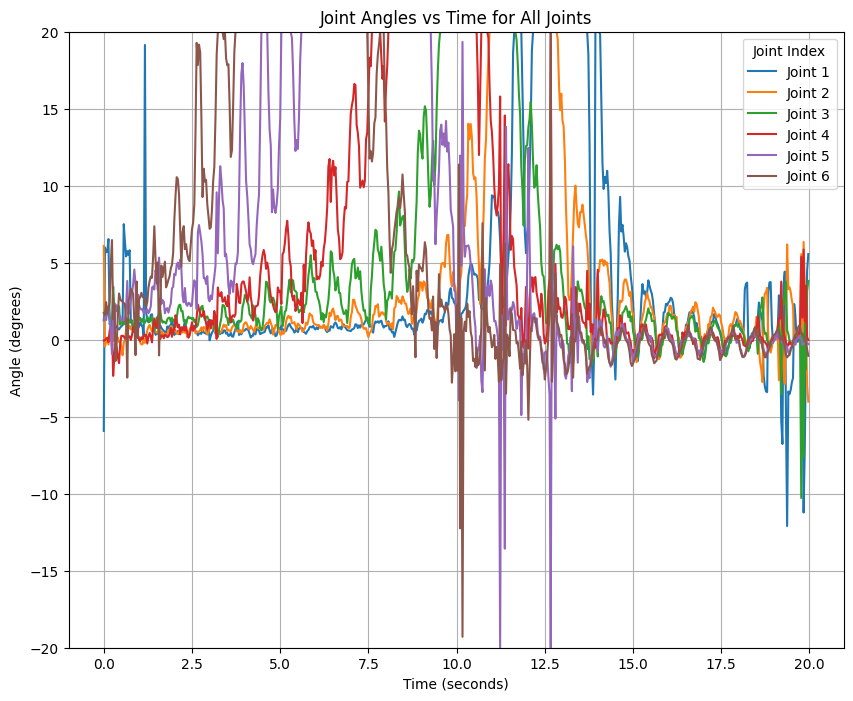

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Limit to the first 20 seconds (600 frames)
frame_rate = 30
num_frames = 20 * frame_rate  # 20 seconds of data
coordinates_df = coordinates_df.head(num_frames)

# Calculate angles using every 3 consecutive markers (forming tangent angles)
angles = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df.iloc[:, 2*i+1].values - coordinates_df.iloc[:, 2*i].values
    vec1_y = coordinates_df.iloc[:, 2*i+2].values - coordinates_df.iloc[:, 2*i+1].values
    vec2_x = coordinates_df.iloc[:, 2*i+3].values - coordinates_df.iloc[:, 2*i+2].values
    vec2_y = coordinates_df.iloc[:, 2*i+4].values - coordinates_df.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -20° and 20°
    filtered_angle = np.clip(angle, -20, 20)
    
    angles.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles = np.array(angles)

# Time axis: convert frames to seconds
time_axis = np.arange(angles.shape[1]) / frame_rate

# Plot the angles for all joints
plt.figure(figsize=(10, 8))

for i in range(angles.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis, angles[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Joint Angles vs Time for All Joints')
plt.ylim(-20, 20)  # Keep the y-axis within the angle range
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


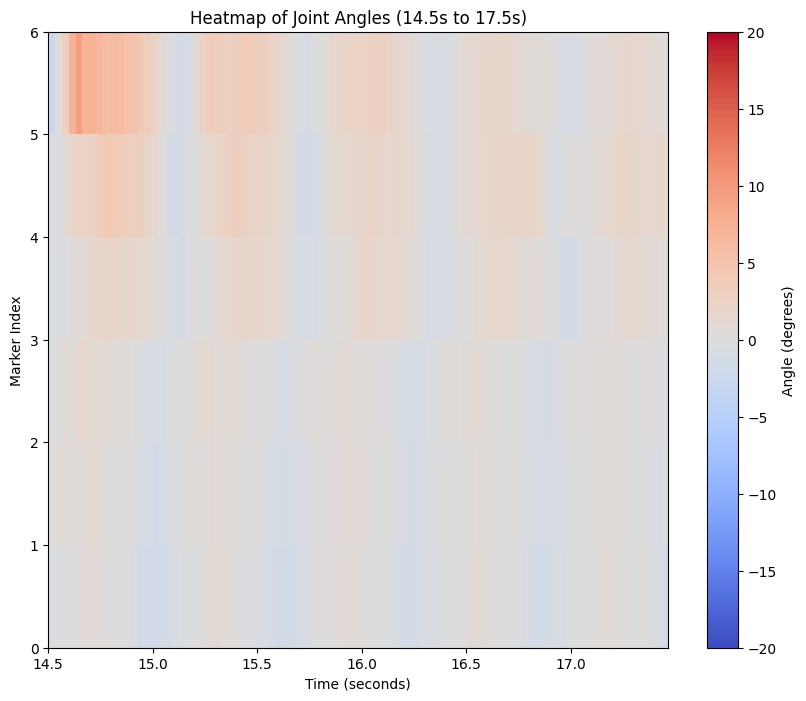

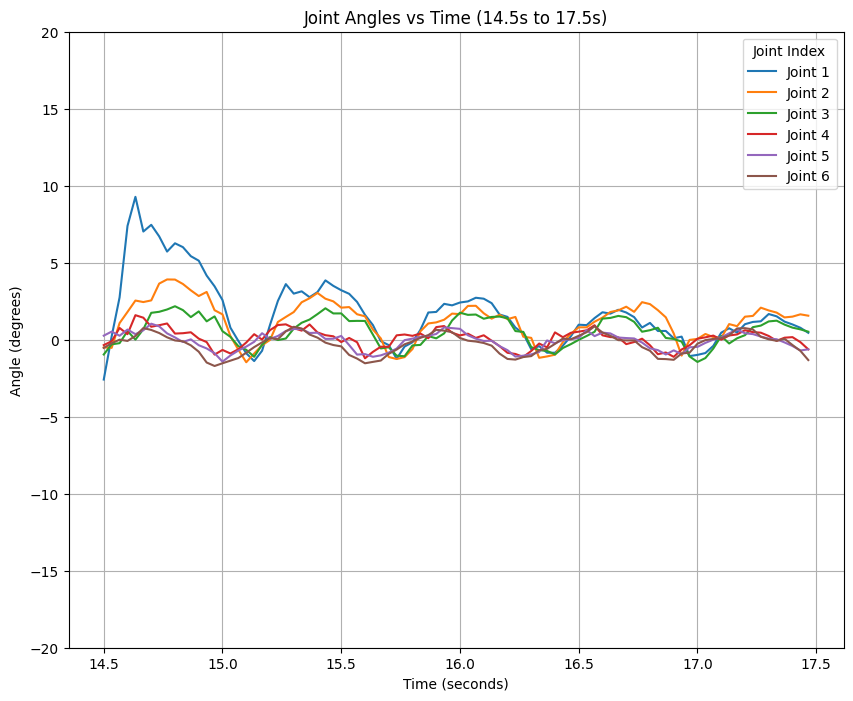

In [51]:
# Adjusting the code to limit the data to between 14.5 and 17.5 seconds

# Define the time window in seconds
start_time = 14.5
end_time = 17.5

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -20° and 20°
    filtered_angle = np.clip(angle, -10, 0)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate + start_time

# Plot the heatmap for the selected time window
plt.figure(figsize=(10, 8))
plt.imshow(angles_window, aspect='auto', cmap='coolwarm', extent=[time_axis_window.min(), time_axis_window.max(), 0, angles_window.shape[0]])
plt.colorbar(label='Angle (degrees)')
plt.clim(-20, 20)
plt.xlabel('Time (seconds)')
plt.ylabel('Marker Index')
plt.title('Heatmap of Joint Angles (14.5s to 17.5s)')
plt.show()

# Plot the angles for all joints for the selected time window
plt.figure(figsize=(10, 8))

for i in range(angles_window.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Joint Angles vs Time (14.5s to 17.5s)')
plt.ylim(-20, 20)
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


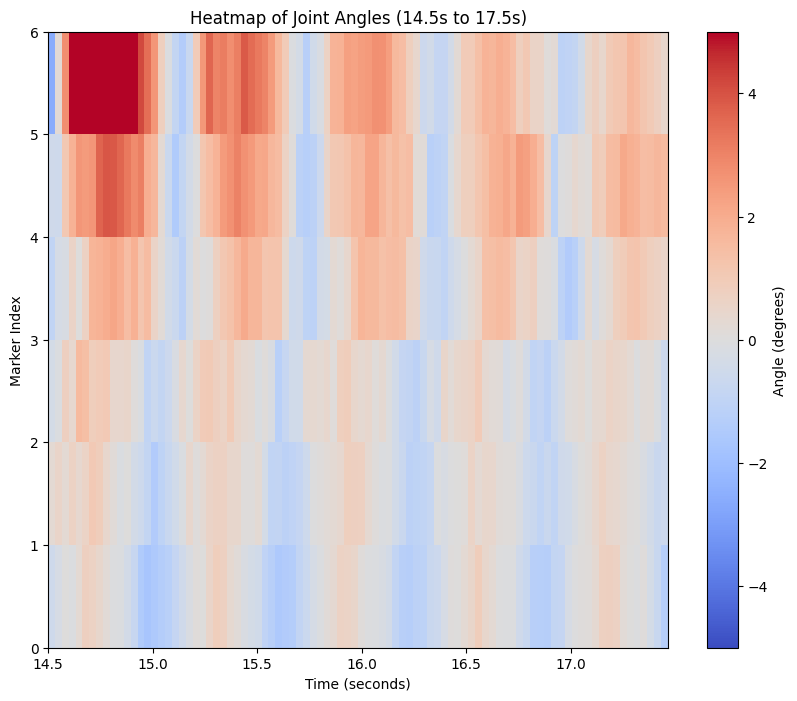

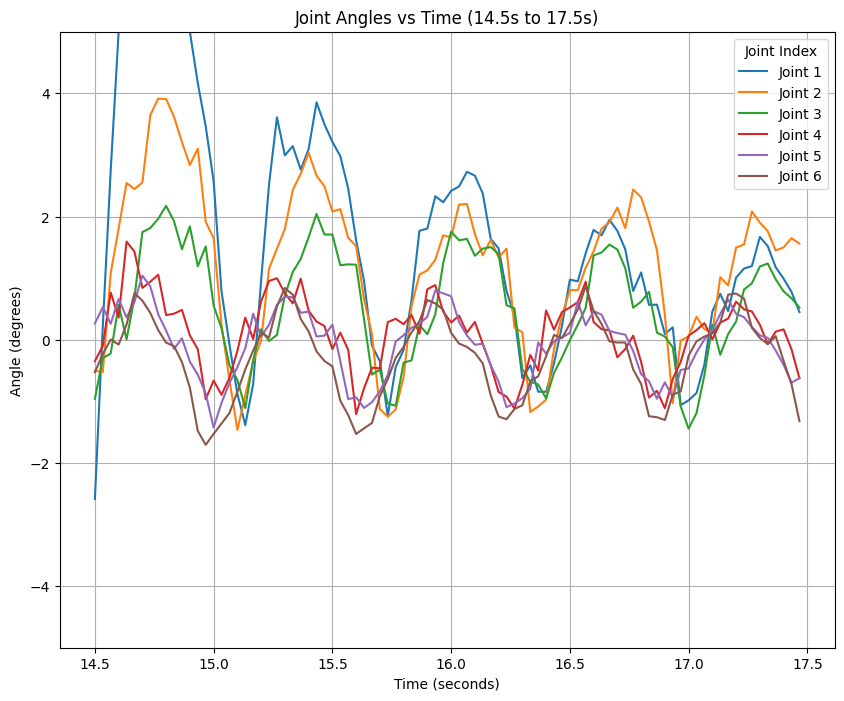

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Limit to the first 20 seconds (600 frames)
frame_rate = 30
num_frames = 20 * frame_rate  # 20 seconds of data
coordinates_df = coordinates_df.head(num_frames)

# Define the time window (14.5 to 17.5 seconds)
start_time = 14.5
end_time = 17.5

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames for the time window
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -5° and 5°
    filtered_angle = np.clip(angle, -5, 5)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate + start_time

# Plot the heatmap for the selected time window
plt.figure(figsize=(10, 8))
plt.imshow(angles_window, aspect='auto', cmap='coolwarm', extent=[time_axis_window.min(), time_axis_window.max(), 0, angles_window.shape[0]])
plt.colorbar(label='Angle (degrees)')
plt.clim(-5, 5)
plt.xlabel('Time (seconds)')
plt.ylabel('Marker Index')
plt.title('Heatmap of Joint Angles (14.5s to 17.5s)')
plt.show()

# Plot the angles for all joints for the selected time window
plt.figure(figsize=(10, 8))

for i in range(angles_window.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Joint Angles vs Time (14.5s to 17.5s)')
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


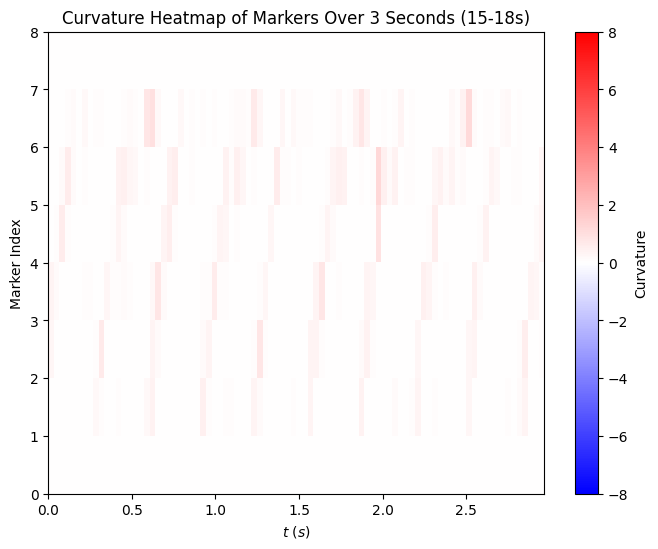

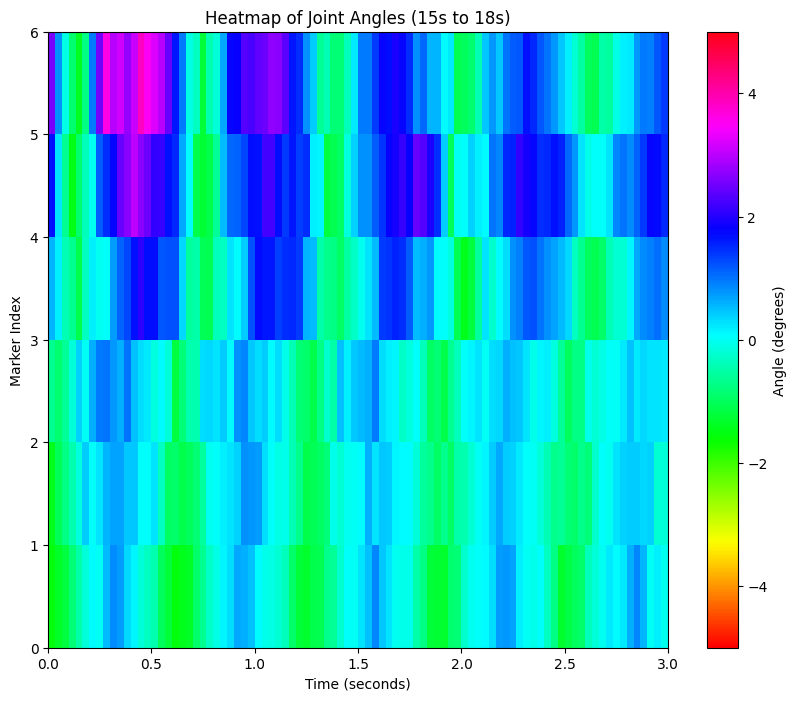

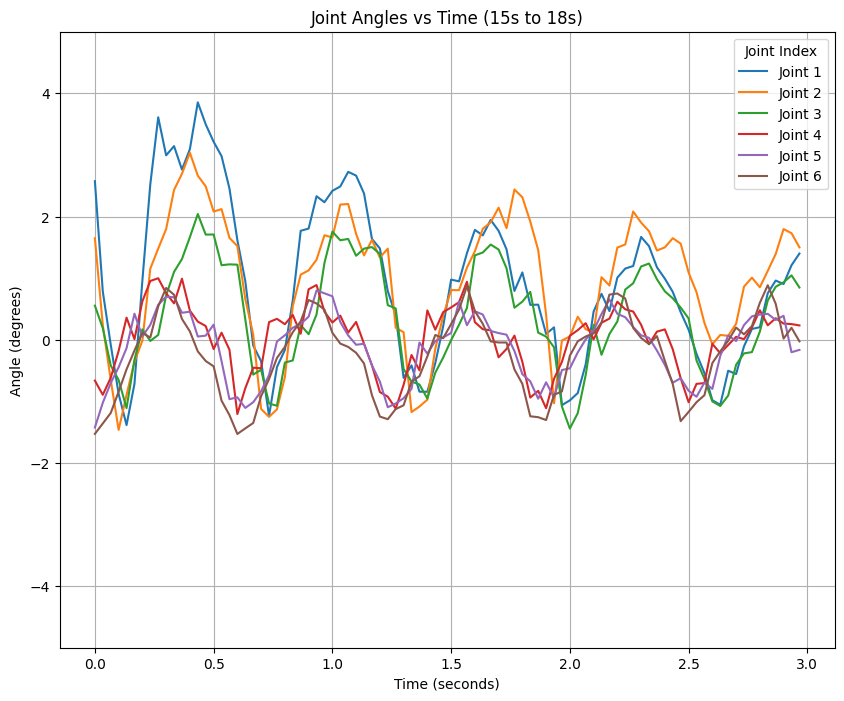

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Define the time window (15 to 18 seconds)
frame_rate = 30
start_time = 15
end_time = 18

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames for the time window
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -5° and 5°
    filtered_angle = np.clip(angle, -5, 5)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate

# Relabel x-axis from 0 to 3 seconds
time_axis_window = time_axis_window - time_axis_window[0]

# Plot the heatmap for the selected time window
plt.figure(figsize=(10, 8))
plt.imshow(angles_window, aspect='auto', cmap='hsv', extent=[0, 3, 0, angles_window.shape[0]])
plt.colorbar(label='Angle (degrees)')
plt.clim(-5, 5)
plt.xlabel('Time (seconds)')
plt.ylabel('Marker Index')
plt.title('Heatmap of Joint Angles (15s to 18s)')
plt.show()

# Plot the angles for all joints for the selected time window
plt.figure(figsize=(10, 8))

for i in range(angles_window.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Joint Angles vs Time (15s to 18s)')
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


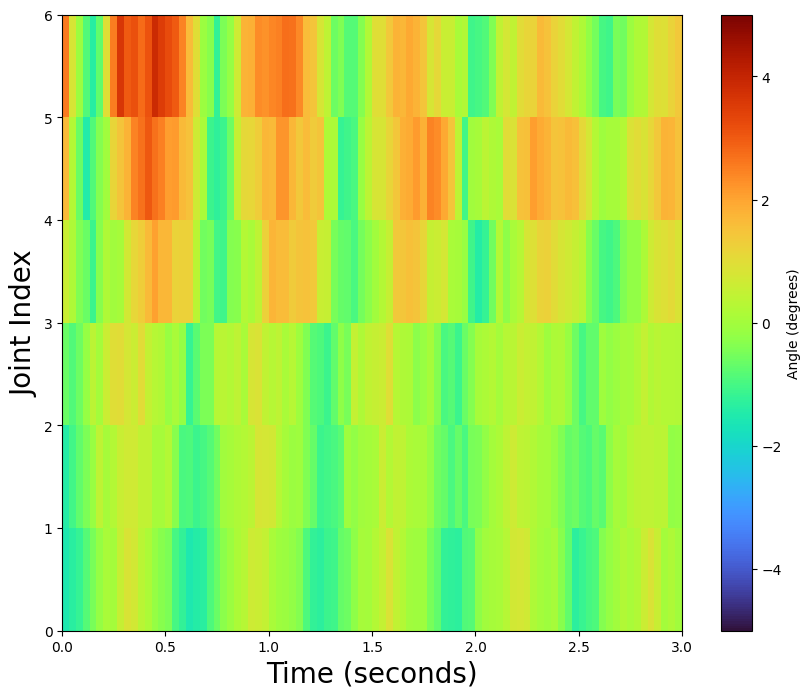

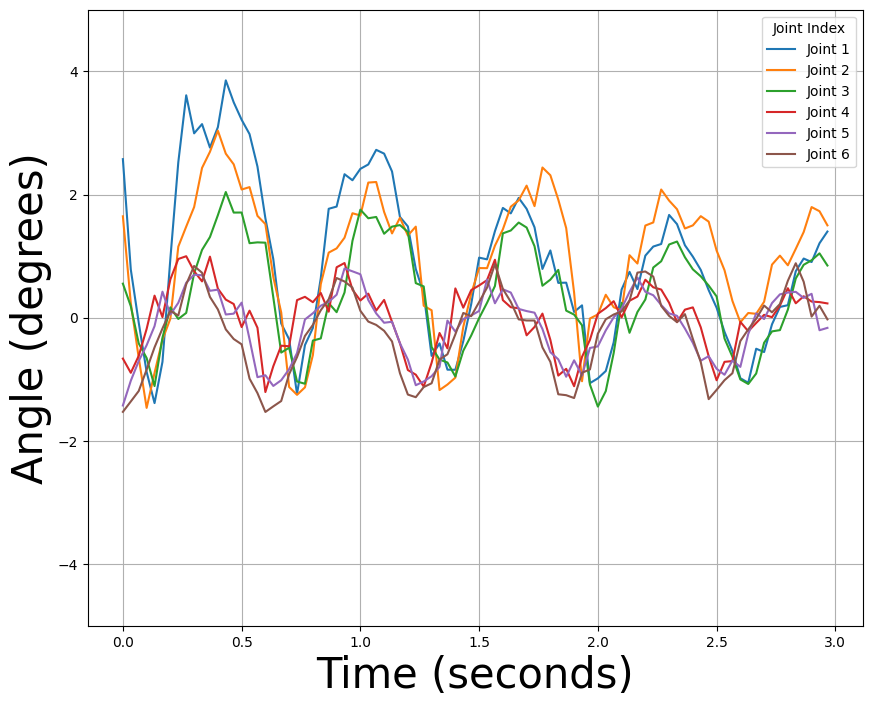

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Define the time window (15 to 18 seconds)
frame_rate = 30
start_time = 15
end_time = 18

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames for the time window
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -5° and 5°
    filtered_angle = np.clip(angle, -5, 5)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate

# Relabel x-axis from 0 to 3 seconds
time_axis_window = time_axis_window - time_axis_window[0]

# Plot the heatmap for the selected time window
plt.figure(figsize=(10, 8))
plt.imshow(angles_window, aspect='auto', cmap='turbo', extent=[0, 3, 0, angles_window.shape[0]])
plt.colorbar(label='Angle (degrees)')
plt.clim(-5, 5)
plt.xlabel('Time (seconds)',fontsize=20)
plt.ylabel('Joint Index',fontsize=20)
# plt.title('Heatmap of Joint Angles (15s to 18s)')
plt.show()

# Plot the angles for all joints for the selected time window
plt.figure(figsize=(10, 8))

for i in range(angles_window.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)', fontsize=30)
plt.ylabel('Angle (degrees)', fontsize=30)
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


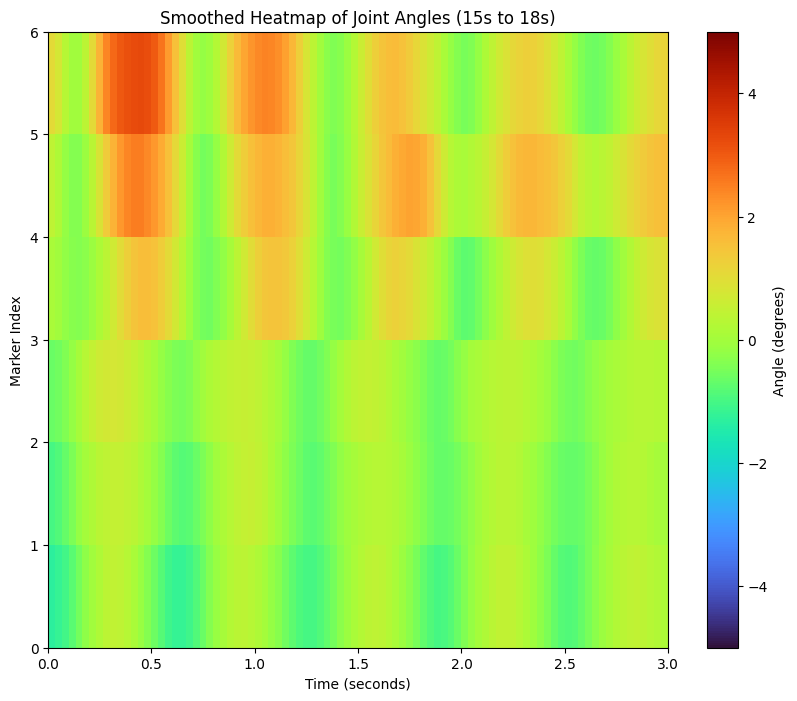

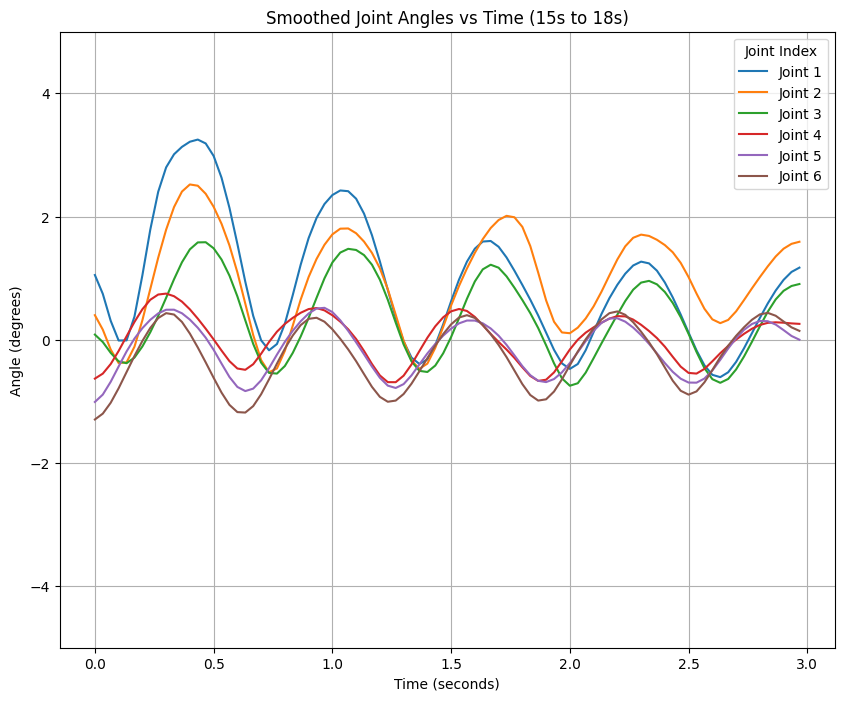

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for each marker
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns].astype(float)

# Define the time window (15 to 18 seconds)
frame_rate = 30
start_time = 15
end_time = 18

# Convert the time window to frames
start_frame = int(start_time * frame_rate)
end_frame = int(end_time * frame_rate)

# Extract the relevant frames for the time window
coordinates_df_window = coordinates_df.iloc[start_frame:end_frame]

# Calculate angles for the selected time window using every 3 consecutive markers (forming tangent angles)
angles_window = []

for i in range(len(coordinate_columns) // 2 - 2):  # Loop through triples of consecutive markers
    # Get the vectors from marker i to i+1 and i+1 to i+2
    vec1_x = coordinates_df_window.iloc[:, 2*i+1].values - coordinates_df_window.iloc[:, 2*i].values
    vec1_y = coordinates_df_window.iloc[:, 2*i+2].values - coordinates_df_window.iloc[:, 2*i+1].values
    vec2_x = coordinates_df_window.iloc[:, 2*i+3].values - coordinates_df_window.iloc[:, 2*i+2].values
    vec2_y = coordinates_df_window.iloc[:, 2*i+4].values - coordinates_df_window.iloc[:, 2*i+3].values
    
    # Compute the cross product to determine the sign of the angle
    cross_product = vec1_x * vec2_y - vec1_y * vec2_x
    
    # Compute the angles between the vectors using dot product and magnitude
    dot_product = vec1_x * vec2_x + vec1_y * vec2_y
    magnitude1 = np.sqrt(vec1_x**2 + vec1_y**2)
    magnitude2 = np.sqrt(vec2_x**2 + vec2_y**2)
    
    # Cosine of the angle
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    # Ensure no invalid values due to floating-point precision
    cos_theta = np.clip(cos_theta, -1, 1)
    
    # Calculate the angle in degrees
    angle = np.degrees(np.arccos(cos_theta))
    
    # Use the cross product to determine the sign of the angle
    angle = np.where(cross_product < 0, -angle, angle)
    
    # Make sure the angles are between -5° and 5°
    filtered_angle = np.clip(angle, -5, 5)
    
    angles_window.append(filtered_angle)

# Convert to a numpy array for easier manipulation
angles_window = np.array(angles_window)

# Apply Gaussian smoothing
angles_window_smoothed = gaussian_filter1d(angles_window, sigma=2, axis=1)

# Time axis: convert frames to seconds
time_axis_window = np.arange(angles_window.shape[1]) / frame_rate

# Relabel x-axis from 0 to 3 seconds
time_axis_window = time_axis_window - time_axis_window[0]

# Plot the smoothed heatmap for the selected time window
plt.figure(figsize=(10, 8))
plt.imshow(angles_window_smoothed, aspect='auto', cmap='turbo', extent=[0, 3, 0, angles_window.shape[0]])
plt.colorbar(label='Angle (degrees)')
plt.clim(-5, 5)
plt.xlabel('Time (seconds)')
plt.ylabel('Marker Index')
plt.title('Smoothed Heatmap of Joint Angles (15s to 18s)')
plt.show()

# Plot the smoothed angles for all joints for the selected time window
plt.figure(figsize=(10, 8))

for i in range(angles_window_smoothed.shape[0]):  # Loop through each joint's angles
    plt.plot(time_axis_window, angles_window_smoothed[i], label=f'Joint {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Smoothed Joint Angles vs Time (15s to 18s)')
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(title="Joint Index")
plt.show()


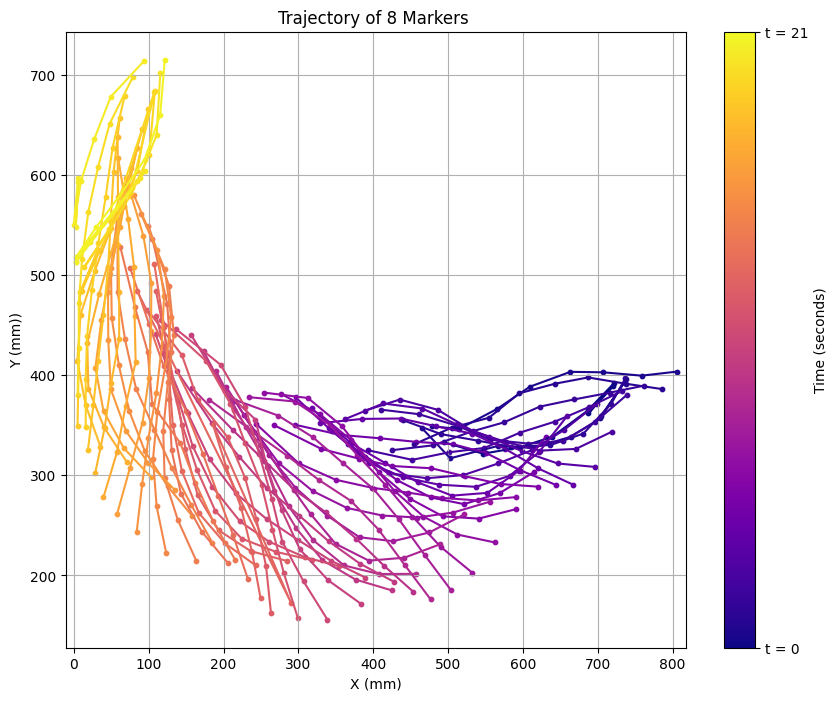

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Load the CSV file
file_path = '/Users/jamesxu/Desktop/swimming centipede/video_1DLC_resnet50_centi_swimSep5shuffle1_100000.csv'  # Update this with the path to your file
df = pd.read_csv(file_path)

# Extract the columns corresponding to the x and y coordinates for the 8 markers
columns = df.iloc[1].tolist()  # Get the header row (contains 'x', 'y', 'likelihood')
coordinate_columns = [i for i, val in enumerate(columns) if val in ['x', 'y']]  # Only select x and y

# Now extract the relevant x, y coordinates into a new dataframe, skipping the first two rows as headers
coordinates_df = df.iloc[2:, coordinate_columns[:16]].astype(float)  # Assuming first 16 columns are x, y for 8 markers

# Separate the x and y coordinates
x_coords = coordinates_df.iloc[:, ::2]  # All x-coordinates (every second column)
y_coords = coordinates_df.iloc[:, 1::2]  # All y-coordinates (every second column starting from index 1)

# Define total time (in seconds) and frame rate (assumed here)
total_time = 21  # Total duration in seconds
frame_rate = 30  # Frames per second (assumed)
total_frames = len(coordinates_df)  # Total number of frames

# Time values associated with each frame
time_values = np.linspace(0, total_time, total_frames)

# Sample every 10th trajectory to reduce overplotting
sampled_indices = np.arange(0, total_frames, 10)
sampled_times = time_values[sampled_indices]  # Get the time for sampled frames

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a color map to represent time progression
colors = cm.plasma(np.linspace(0, 1, len(sampled_indices)))

# Plot the lines connecting all 8 markers for each sampled frame and add dots
for idx, i in enumerate(sampled_indices[:-1]):  # Skip the last to avoid out-of-range error
    ax.plot(x_coords.iloc[i, :], y_coords.iloc[i, :], color=colors[idx])
    ax.scatter(x_coords.iloc[i, :], y_coords.iloc[i, :], color=colors[idx], s=10)  # Add marker dots

# Set x-axis limits to ensure all markers are plotted
ax.set_xlim(x_coords.min().min() - 10, x_coords.max().max() + 10)

# Manually create a color bar for the time progression using actual time values
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=total_time))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Time (seconds)')
cbar.set_ticks([0, total_time])
cbar.set_ticklabels(['t = 0', f't = {total_time}'])

# Add labels and title
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm))')
ax.set_title('Trajectory of 8 Markers ')
ax.grid(True)

# Show the plot
plt.show()
